In [46]:
# IMPORT PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
pip install wordcloud

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# IMPORT DATASET
DATA = pd.read_excel(r'C:\Users\Admin\Documents\Womens Clothing Reviews Data.xlsx')

###  Performing exploratory analysis on the data to understand the patterns

In [5]:
DATA.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [6]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [7]:
DATA.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [8]:
DATA["Category"]=np.where(DATA["Category"].isna(),DATA["Category"].mode(),DATA["Category"])
DATA["Subcategory1"]=np.where(DATA["Subcategory1"].isna(),DATA["Subcategory1"].mode(),DATA["Subcategory1"])
DATA["SubCategory2"]=np.where(DATA["SubCategory2"].isna(),DATA["SubCategory2"].mode(),DATA["SubCategory2"])

In [9]:
# Filling missing values in 'Review Title' with 'No Title'
DATA["Review Title"]=np.where(DATA["Review Title"].isna(),"NO TITLE",DATA["Review Title"])

In [10]:
# MISSING VALUE PERCENTAGE FOR REVIEW TEXT
miising=(DATA["Review Text"].isna().sum()/len(DATA))*100
miising

3.5978881035510515

In [11]:
# SINCE MISSING PERCENTAGE OF REVIEW TEXT IS > 7% WE WILL DROP THE MISSING ROWS
# Dropping rows where 'Review Text' is missing
DATA =DATA.dropna(subset=['Review Text'])

In [12]:
DATA.isna().sum()

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64

In [13]:
DATA.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,22641.000000,22641.000000,22641.000000,22641.000000
mean,919.332362,43.280376,4.183561,0.818868
std,202.266874,12.326980,1.115762,0.385136
min,1.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


###  Perform text mining tasks to understand what most frequent words are using for positive 
sentiment and negative sentiment. Create word clouds for the positive & negative reviews 
separately.


In [14]:
# Classify reviews based on Rating
DATA['Sentiment'] = DATA['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

In [15]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stop words
    return ' '.join(tokens)

In [16]:
# Clean the review text
DATA['Cleaned Review Text'] = DATA['Review Text'].apply(clean_text)

In [17]:
# Generate word cloud for positive reviews
positive_reviews = ' '.join(DATA[DATA['Sentiment'] == 'Positive']['Cleaned Review Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

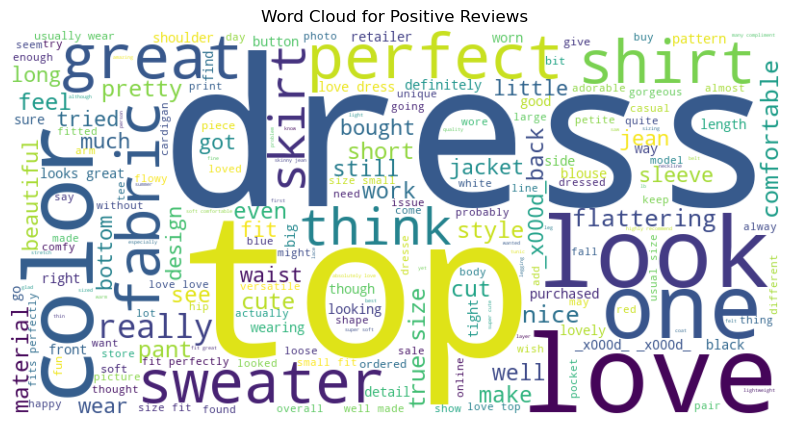

In [18]:
# Plot positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [19]:
# Generate word cloud for negative reviews
negative_reviews = ' '.join(DATA[DATA['Sentiment'] == 'Negative']['Cleaned Review Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

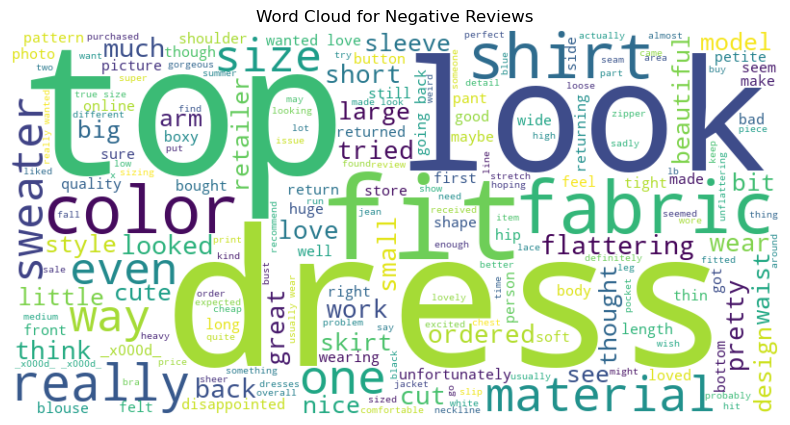

In [20]:
# Plot negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

### Understand sentiment among the customers on the different categories, sub categories, 
products by location and age group

In [21]:
# Create Age Groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']
DATA['Age Group'] = pd.cut(DATA['Customer Age'], bins=bins, labels=labels)


In [22]:
# Group sentiment by Category, Subcategory1, Location, and Age Group ,SubCategory2
sentiment_by_subcategory2 =DATA.groupby(['SubCategory2', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_category =DATA.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_subcategory = DATA.groupby(['Subcategory1', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_location = DATA.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)
sentiment_by_age = DATA.groupby(['Age Group', 'Sentiment']).size().unstack(fill_value=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\3575287783.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age = DATA.groupby(['Age Group', 'Sentiment']).size().unstack(fill_value=0)


In [23]:
# Calculate proportion of positive sentiment
sentiment_by_category['Positive Ratio'] = sentiment_by_category['Positive'] / (sentiment_by_category['Positive'] + sentiment_by_category['Negative'])
sentiment_by_subcategory['Positive Ratio'] = sentiment_by_subcategory['Positive'] / (sentiment_by_subcategory['Positive'] + sentiment_by_subcategory['Negative'])
sentiment_by_location['Positive Ratio'] = sentiment_by_location['Positive'] / (sentiment_by_location['Positive'] + sentiment_by_location['Negative'])
sentiment_by_age['Positive Ratio'] = sentiment_by_age['Positive'] / (sentiment_by_age['Positive'] + sentiment_by_age['Negative'])
sentiment_by_subcategory2['Positive Ratio'] = sentiment_by_subcategory2['Positive'] / (sentiment_by_subcategory2['Positive'] + sentiment_by_subcategory2['Negative'])


In [24]:
# Display results
sentiment_by_category.head(), sentiment_by_subcategory.head(), sentiment_by_location.head(), sentiment_by_age.head(),sentiment_by_subcategory2.head()

(Sentiment       Negative  Positive  Positive Ratio
 Category                                          
 General             3169     10209        0.763119
 General Petite      1744      6093        0.777466
 Initmates            280      1146        0.803647,
 Sentiment     Negative  Positive  Positive Ratio
 Subcategory1                                    
 Bottoms            724      2938        0.802294
 Dresses           1511      4634        0.754109
 Intimate           324      1329        0.803993
 Jackets            198       804        0.802395
 Tops              2396      7665        0.761853,
 Sentiment  Negative  Positive  Positive Ratio
 Location                                     
 Bangalore      1162      3888        0.769901
 Chennai         495      1746        0.779116
 Gurgaon        1986      6505        0.766105
 Mumbai         1550      5309        0.774020,
 Sentiment  Negative  Positive  Positive Ratio
 Age Group                                    
 <18       

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\454453374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_category.index, y=sentiment_by_category['Positive Ratio'], palette='coolwarm')


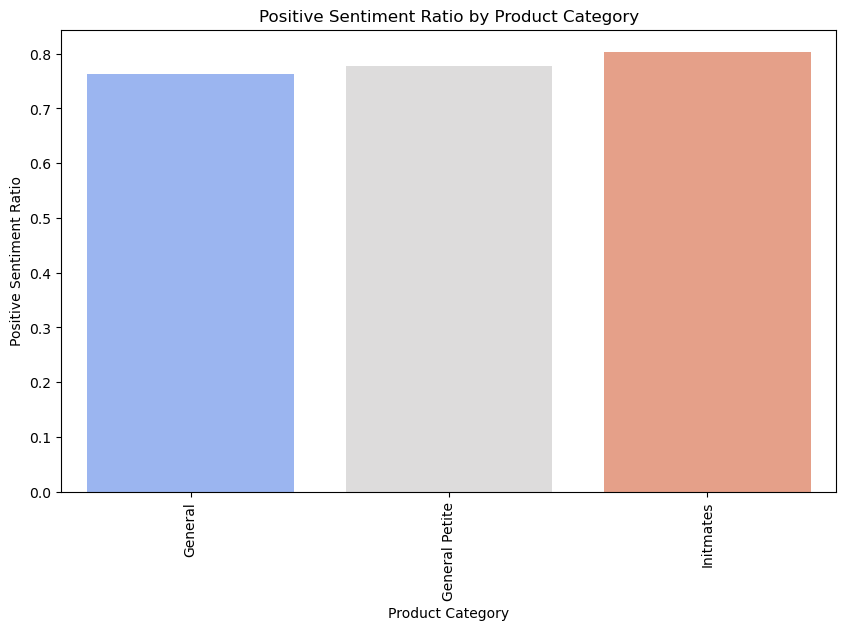

In [26]:
# Plot Sentiment by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_category.index, y=sentiment_by_category['Positive Ratio'], palette='coolwarm')
plt.title('Positive Sentiment Ratio by Product Category')
plt.xticks(rotation=90)
plt.ylabel('Positive Sentiment Ratio')
plt.xlabel('Product Category')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\2654813842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_subcategory.index, y=sentiment_by_subcategory['Positive Ratio'], palette='Set3')


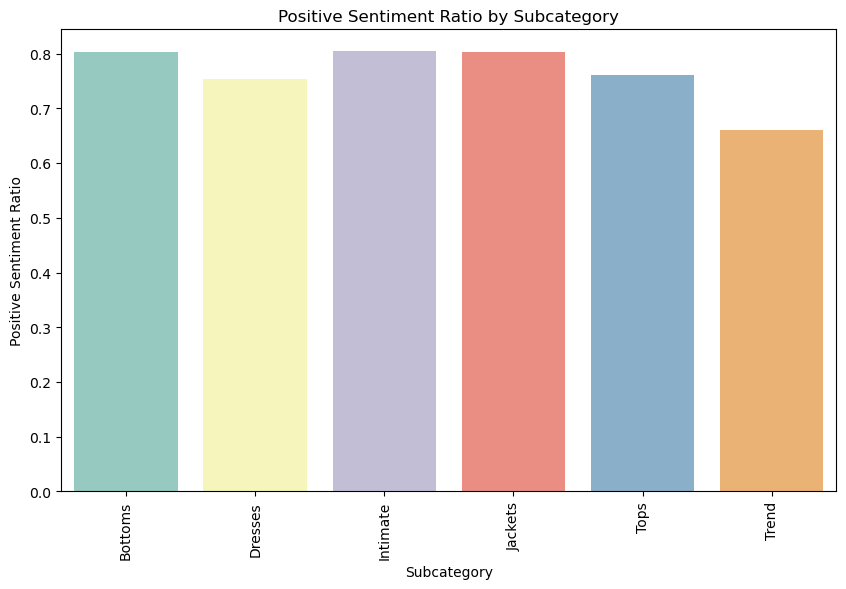

In [27]:
# Plot Sentiment by Subcategory1
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_subcategory.index, y=sentiment_by_subcategory['Positive Ratio'], palette='Set3')
plt.title('Positive Sentiment Ratio by Subcategory')
plt.xticks(rotation=90)
plt.ylabel('Positive Sentiment Ratio')
plt.xlabel('Subcategory')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\679767648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_subcategory2.index, y=sentiment_by_subcategory2['Positive Ratio'], palette='Spectral')


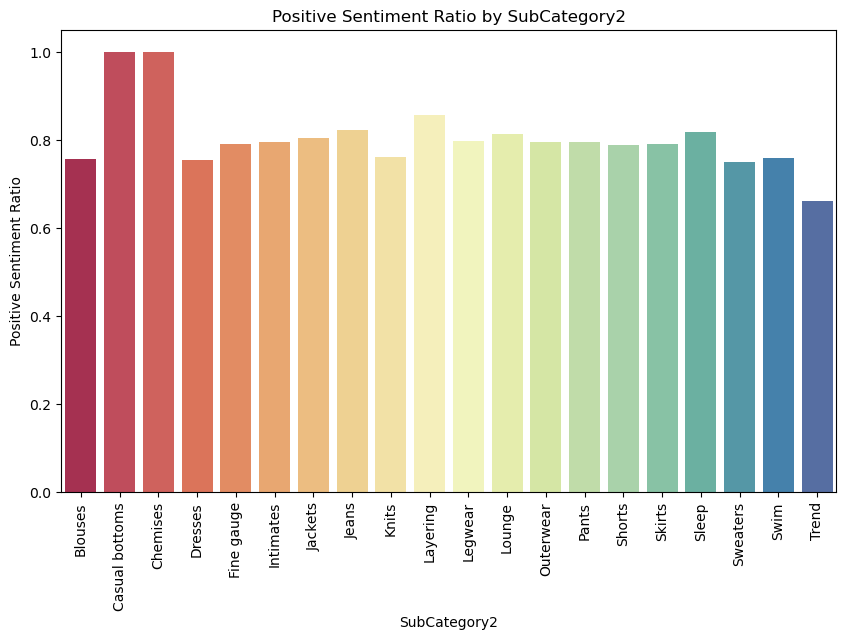

In [28]:
# Plot Sentiment by SubCategory2
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_subcategory2.index, y=sentiment_by_subcategory2['Positive Ratio'], palette='Spectral')
plt.title('Positive Sentiment Ratio by SubCategory2')
plt.xticks(rotation=90)
plt.ylabel('Positive Sentiment Ratio')
plt.xlabel('SubCategory2')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\3902417755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_location.index, y=sentiment_by_location['Positive Ratio'], palette='plasma')


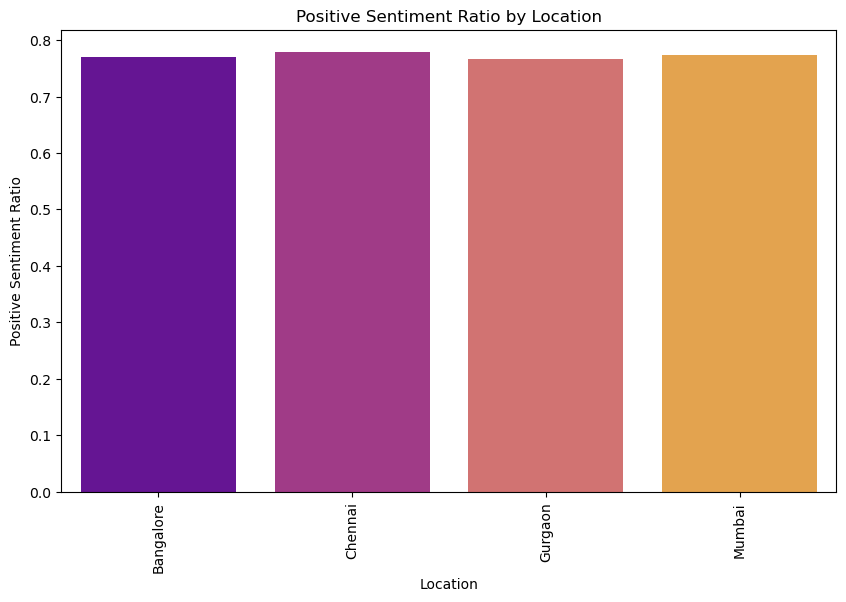

In [29]:
# Plot Sentiment by Location
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_by_location.index, y=sentiment_by_location['Positive Ratio'], palette='plasma')
plt.title('Positive Sentiment Ratio by Location')
plt.xticks(rotation=90)
plt.ylabel('Positive Sentiment Ratio')
plt.xlabel('Location')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9312\843421243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_age.index, y=sentiment_by_age['Positive Ratio'], palette='coolwarm')


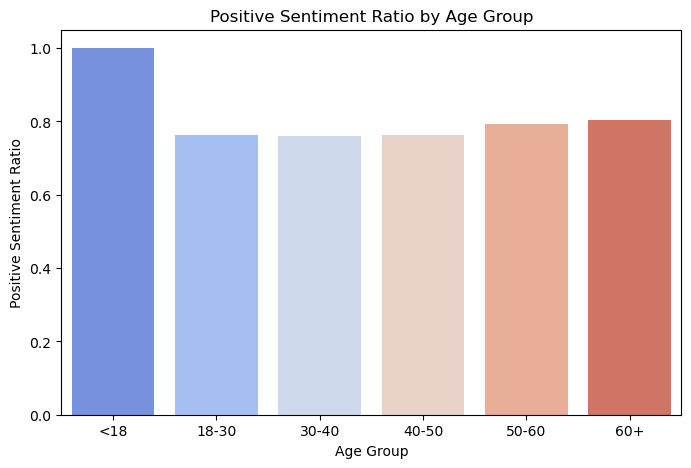

In [30]:
# Plot Sentiment by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_by_age.index, y=sentiment_by_age['Positive Ratio'], palette='coolwarm')
plt.title('Positive Sentiment Ratio by Age Group')
plt.ylabel('Positive Sentiment Ratio')
plt.xlabel('Age Group')
plt.show()

### Perform predictive analytics to understand the drivers of customers who are recommending 
the products.

In [32]:
# Features to be used for prediction
features = ['Rating', 'Category', 'Customer Age', 'Location', 'Channel']

In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Category', 'Location', 'Channel']:
    DATA[col] = label_encoder.fit_transform(DATA[col])

In [35]:
# Create the target variable (Recommend Flag) and the feature matrix
X = DATA[features]
y = DATA['Recommend Flag']

In [36]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
### We’ll use a Random Forest Classifier for prediction.
# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.98%


In [40]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       812
           1       0.95      0.95      0.95      3717

    accuracy                           0.92      4529
   macro avg       0.86      0.86      0.86      4529
weighted avg       0.92      0.92      0.92      4529



In [41]:
# Get feature importance from the random forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [42]:
# Display feature importances
print(feature_importances)

        Feature  Importance
0        Rating    0.845052
2  Customer Age    0.121737
3      Location    0.017709
1      Category    0.009466
4       Channel    0.006035


Conclusion:
The primary driver of customer recommendations is the rating they give to the product. Customer age also has some influence, while factors like location, category, and channel are less significant in determining whether customers will recommend a product.

### Create topics and understand themes behind the topics by performing topic mining.

In [45]:
# Use CountVectorizer to create a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(DATA['Cleaned Review Text'])

In [47]:
###  Apply LDA for Topic Modeling
# Fit the LDA model (specify the number of topics you want, e.g., 5)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [48]:
# Get the words from the vectorizer
words = vectorizer.get_feature_names_out()

In [ ]:
# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))